In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
from collections import Counter
from matplotlib import cm
from matplotlib.colors import ListedColormap

import io
from pysam import VariantFile
from matplotlib_venn import venn3
import venn

In [3]:
tab20 = cm.get_cmap('tab10', 8)
newcmap_list = []
for i in range(4):
    newcmap_list.append(tab20.colors[i])
for i in range(4):
    newcmap_list.append(np.array(list(tab20.colors[i][:-1]) +[0.3]))

newcmap = ListedColormap(newcmap_list, name='newcmap')

In [4]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    res = pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})
    return res

# SNV calling

## 986_100215

In [5]:
foo = lambda x: pd.Series(x.split('CALLERS=')[1].split(';')[0])
vcf_pd = read_vcf("../data/2015-07-31_CRC-809_110914-filter-05-05/CRC-809_110914-filter-05-05-ensemble-annotated.vcf")

vcf_pd['INFO'] = vcf_pd['INFO'].apply(foo)
vcf_pd['freebayes'] = vcf_pd['INFO'].str.contains('freebayes')
vcf_pd['vardict'] = vcf_pd['INFO'].str.contains('vardict')
vcf_pd['varscan'] = vcf_pd['INFO'].str.contains('varscan')
vcf_pd['mutect2'] = vcf_pd['INFO'].str.contains('mutect2')
vcf_pd['strelka2'] = vcf_pd['INFO'].str.contains('strelka2')
vcf_pd.drop('INFO', axis=1)


vcf_pd['SNV callers'] = vcf_pd['freebayes'].map(str) + '_' + vcf_pd['vardict'].map(str) +  '_' + vcf_pd['varscan'].map(str)
a = vcf_pd[['SNV callers']].apply(pd.value_counts)
print(vcf_pd[vcf_pd['CHROM'] == '22'].shape[0])
## /!\: there are 2 mutations located on chr7 ???

b = vcf_pd[vcf_pd['CHROM'] == '22'][['SNV callers']].apply(pd.value_counts)
b.index.name='freebayes_vardict_varscan'
b.head()/vcf_pd[vcf_pd['CHROM'] == '22'].shape[0]*100

729


,SNV callers
freebayes_vardict_varscan,
False_True_True,20.438957
True_True_True,16.049383
False_True_False,14.403292
False_False_True,13.031550
True_True_False,12.620027


/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


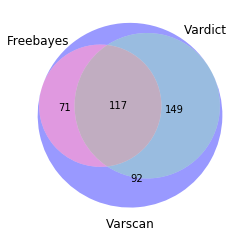

In [6]:
v=venn3(subsets = (0, 0, 0, b['SNV callers'].loc['True_True_False'], b['SNV callers'].loc['True_False_True'], b['SNV callers'].loc['False_True_True'], b['SNV callers'].loc['True_True_True']),
        set_labels = ('Freebayes', 'Vardict', 'Varscan'))
plt.show()

In [7]:
vcf_pd['SNV callers'] = vcf_pd['freebayes'].map(str) + '_' + vcf_pd['mutect2'].map(str) + '_' + vcf_pd['strelka2'].map(str) + '_' + vcf_pd['vardict'].map(str) +  '_' + vcf_pd['varscan'].map(str)
a = vcf_pd[['SNV callers']].apply(pd.value_counts)
print(vcf_pd[vcf_pd['CHROM'] == '22'].shape[0])
## /!\: there are 2 mutations located on chr7 ???

b = vcf_pd[vcf_pd['CHROM'] == '22'][['SNV callers']].apply(pd.value_counts)
b.index.name='freebayes_mutect2_strelka2_vardict_varscan'
b/vcf_pd[vcf_pd['CHROM'] == '22'].shape[0]*100

729


,SNV callers
freebayes_mutect2_strelka2_vardict_varscan,
False_False_False_True_True,11.796982
False_True_False_True_False,10.699588
True_True_True_True_True,7.956104
False_True_True_False_False,6.721536
False_False_True_False_True,6.035665
True_False_False_False_True,5.761317
False_False_True_True_True,5.486968
True_False_True_True_True,5.075446
True_True_True_True_False,3.840878


/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


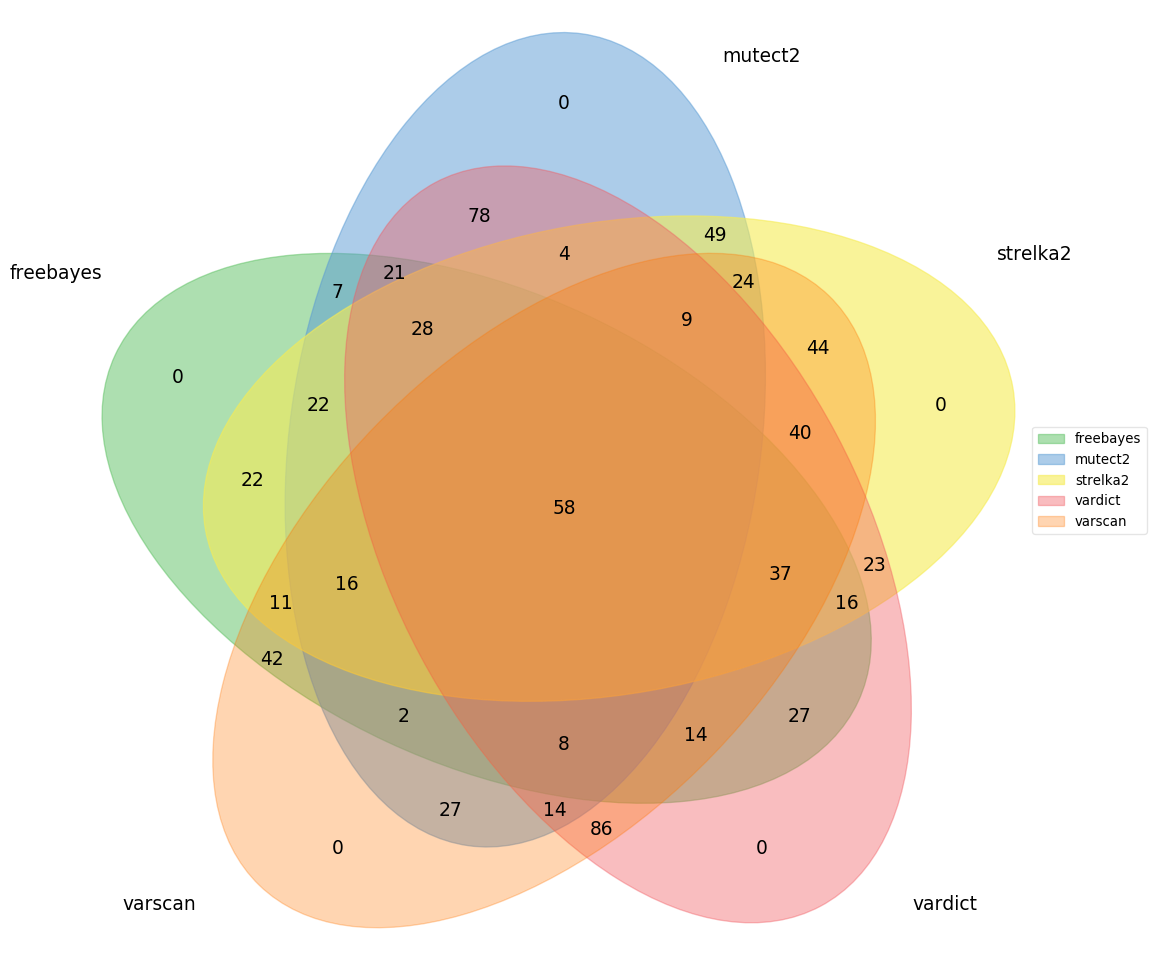

In [8]:
labels = {'00001': 0,#b['SNV callers'].loc['False_False_False_False_True'],
          '00010': 0, #b['SNV callers'].loc['False_False_False_True_False'],
          '00011': b['SNV callers'].loc['False_False_False_True_True'],
          '00100': 0, #b['SNV callers'].loc['False_False_True_False_False'],
          '00101': b['SNV callers'].loc['False_False_True_False_True'],
          '00110': b['SNV callers'].loc['False_False_True_True_False'],
          '00111': b['SNV callers'].loc['False_False_True_True_True'],
          '01000': 0, #b['SNV callers'].loc['False_True_False_False_False'],
          '01001': b['SNV callers'].loc['False_True_False_False_True'],
          '01010': b['SNV callers'].loc['False_True_False_True_False'],
          '01011': b['SNV callers'].loc['False_True_False_True_True'],
          '01100': b['SNV callers'].loc['False_True_True_False_False'],
          '01101': b['SNV callers'].loc['False_True_True_False_True'],
          '01110': b['SNV callers'].loc['False_True_True_True_False'],
          '01111': b['SNV callers'].loc['False_True_True_True_True'],
          '10000': 0, #b['SNV callers'].loc['True_False_False_False_False'],
          '10001': b['SNV callers'].loc['True_False_False_False_True'],
          '10010': b['SNV callers'].loc['True_False_False_True_False'],
          '10011': b['SNV callers'].loc['True_False_False_True_True'],
          '10100': b['SNV callers'].loc['True_False_True_False_False'],
          '10101': b['SNV callers'].loc['True_False_True_False_True'],
          '10110': b['SNV callers'].loc['True_False_True_True_False'],
          '10111': b['SNV callers'].loc['True_False_True_True_True'],
          '11000': b['SNV callers'].loc['True_True_False_False_False'],
          '11001': b['SNV callers'].loc['True_True_False_False_True'],
          '11010': b['SNV callers'].loc['True_True_False_True_False'],
          '11011': b['SNV callers'].loc['True_True_False_True_True'],
          '11100': b['SNV callers'].loc['True_True_True_False_False'],
          '11101': b['SNV callers'].loc['True_True_True_False_True'],
          '11110': b['SNV callers'].loc['True_True_True_True_False'],
          '11111': b['SNV callers'].loc['True_True_True_True_True'],
         }
          

fig, ax = venn.venn5(labels, names=['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan'])
fig.show()

## 809_110914

In [18]:
foo = lambda x: pd.Series(x.split('CALLERS=')[1].split(';')[0])
vcf_pd = read_vcf("../data/2015-07-31_CRC-809_110914-filter/CRC-809_110914-filter-ensemble-annotated.vcf")
vcf_pd['INFO'] = vcf_pd['INFO'].apply(foo)
vcf_pd['freebayes'] = vcf_pd['INFO'].str.contains('freebayes')
vcf_pd['vardict'] = vcf_pd['INFO'].str.contains('vardict')
vcf_pd['varscan'] = vcf_pd['INFO'].str.contains('varscan')
vcf_pd['mutect2'] = vcf_pd['INFO'].str.contains('mutect2')
vcf_pd['strelka2'] = vcf_pd['INFO'].str.contains('strelka2')
vcf_pd.drop('INFO', axis=1)
#vcf_pd = vcf_pd[['CHROM', "POS", 'REF', "ALT", 'freebayes', 'vardict', 'varscan']]
#vcf_pd.head()

vcf_pd['SNV callers'] = vcf_pd['freebayes'].map(str) + '_' + vcf_pd['vardict'].map(str) +  '_' + vcf_pd['varscan'].map(str)
a = vcf_pd[['SNV callers']].apply(pd.value_counts)
print(vcf_pd[vcf_pd['CHROM'] == '22'].shape[0])
## /!\: there are 2 mutations located on chr7 ???

b = vcf_pd[vcf_pd['CHROM'] == '22'][['SNV callers']].apply(pd.value_counts)
b.index.name='freebayes_vardict_varscan'
b.head()/vcf_pd[vcf_pd['CHROM'] == '22'].shape[0]*100

729


,SNV callers
freebayes_vardict_varscan,
False_True_True,20.438957
True_True_True,16.049383
False_True_False,14.403292
False_False_True,13.031550
True_True_False,12.620027


/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


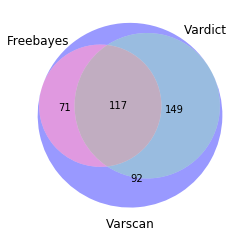

In [19]:
v=venn3(subsets = (0, 0, 0, b['SNV callers'].loc['True_True_False'], b['SNV callers'].loc['True_False_True'], b['SNV callers'].loc['False_True_True'], b['SNV callers'].loc['True_True_True']),
        set_labels = ('Freebayes', 'Vardict', 'Varscan'))
plt.show()

In [20]:
vcf_pd['SNV callers'] = vcf_pd['freebayes'].map(str) + '_' + vcf_pd['mutect2'].map(str) + '_' + vcf_pd['strelka2'].map(str) + '_' + vcf_pd['vardict'].map(str) +  '_' + vcf_pd['varscan'].map(str)
a = vcf_pd[['SNV callers']].apply(pd.value_counts)
print(vcf_pd[vcf_pd['CHROM'] == '22'].shape[0])
## /!\: there are 2 mutations located on chr7 ???

b = vcf_pd[vcf_pd['CHROM'] == '22'][['SNV callers']].apply(pd.value_counts)
b.index.name='freebayes_mutect2_strelka2_vardict_varscan'
b/vcf_pd[vcf_pd['CHROM'] == '22'].shape[0]*100

729


,SNV callers
freebayes_mutect2_strelka2_vardict_varscan,
False_False_False_True_True,11.796982
False_True_False_True_False,10.699588
True_True_True_True_True,7.956104
False_True_True_False_False,6.721536
False_False_True_False_True,6.035665
True_False_False_False_True,5.761317
False_False_True_True_True,5.486968
True_False_True_True_True,5.075446
True_True_True_True_False,3.840878


/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


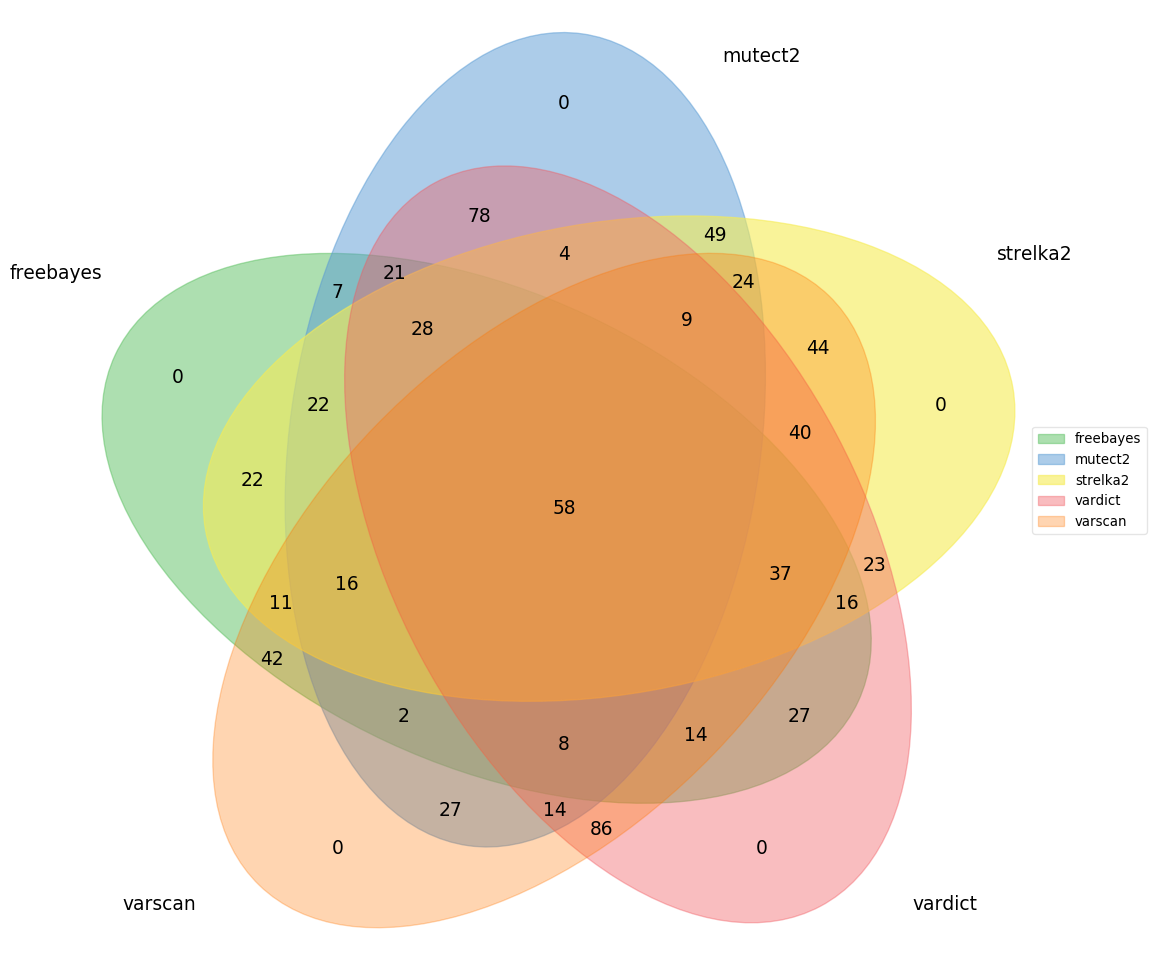

In [21]:
labels = {'00001': 0,#b['SNV callers'].loc['False_False_False_False_True'],
          '00010': 0, #b['SNV callers'].loc['False_False_False_True_False'],
          '00011': b['SNV callers'].loc['False_False_False_True_True'],
          '00100': 0, #b['SNV callers'].loc['False_False_True_False_False'],
          '00101': b['SNV callers'].loc['False_False_True_False_True'],
          '00110': b['SNV callers'].loc['False_False_True_True_False'],
          '00111': b['SNV callers'].loc['False_False_True_True_True'],
          '01000': 0, #b['SNV callers'].loc['False_True_False_False_False'],
          '01001': b['SNV callers'].loc['False_True_False_False_True'],
          '01010': b['SNV callers'].loc['False_True_False_True_False'],
          '01011': b['SNV callers'].loc['False_True_False_True_True'],
          '01100': b['SNV callers'].loc['False_True_True_False_False'],
          '01101': b['SNV callers'].loc['False_True_True_False_True'],
          '01110': b['SNV callers'].loc['False_True_True_True_False'],
          '01111': b['SNV callers'].loc['False_True_True_True_True'],
          '10000': 0, #b['SNV callers'].loc['True_False_False_False_False'],
          '10001': b['SNV callers'].loc['True_False_False_False_True'],
          '10010': b['SNV callers'].loc['True_False_False_True_False'],
          '10011': b['SNV callers'].loc['True_False_False_True_True'],
          '10100': b['SNV callers'].loc['True_False_True_False_False'],
          '10101': b['SNV callers'].loc['True_False_True_False_True'],
          '10110': b['SNV callers'].loc['True_False_True_True_False'],
          '10111': b['SNV callers'].loc['True_False_True_True_True'],
          '11000': b['SNV callers'].loc['True_True_False_False_False'],
          '11001': b['SNV callers'].loc['True_True_False_False_True'],
          '11010': b['SNV callers'].loc['True_True_False_True_False'],
          '11011': b['SNV callers'].loc['True_True_False_True_True'],
          '11100': b['SNV callers'].loc['True_True_True_False_False'],
          '11101': b['SNV callers'].loc['True_True_True_False_True'],
          '11110': b['SNV callers'].loc['True_True_True_True_False'],
          '11111': b['SNV callers'].loc['True_True_True_True_True'],
         }
          

fig, ax = venn.venn5(labels, names=['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan'])
fig.show()